In [31]:
import pandas as pd
from matplotlib import pyplot as plt
# 假设你已经有一个tableFrame包含交易数据
table = pd.read_parquet('ag')



In [32]:
def mid_price(filtered_table):
    mid = (filtered_table['AskPrice1'] + filtered_table['BidPrice1'])/2
    mid = mid.astype(float)
    return mid

In [44]:
table['current_volume'] = table['Volume'].diff()
table['Position Increase'] = table['OpenInterest'].diff()
table['current_turnover'] = table['Turnover'].diff()
table['current_avg_price'] = table['current_turnover']/(table['current_volume']*15)

In [ ]:
table['exchange_time'] = pd.to_datetime(table['exchange_time'])
start_time =  pd.to_datetime('2024-10-21 08:59:00.500')
end_time = pd.to_datetime('2024-10-21 09:04:00.000')
table['returns'] = -mid_price(table).diff(-120)
filtered_table = table[(table['exchange_time'] >= start_time) & (table['exchange_time'] <= end_time)]
# columns_to_standardize = ['AskPrice1', 'BidPrice1','returns']
# filtered_table[columns_to_standardize] = (filtered_table[columns_to_standardize] - filtered_table[columns_to_standardize].mean())/filtered_table[columns_to_standardize].std()

C:\Users\quant7\AppData\Local\Temp\ipykernel_87500\3847892770.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_table[columns_to_standardize] = (filtered_table[columns_to_standardize] - filtered_table[columns_to_standardize].mean())/filtered_table[columns_to_standardize].std()


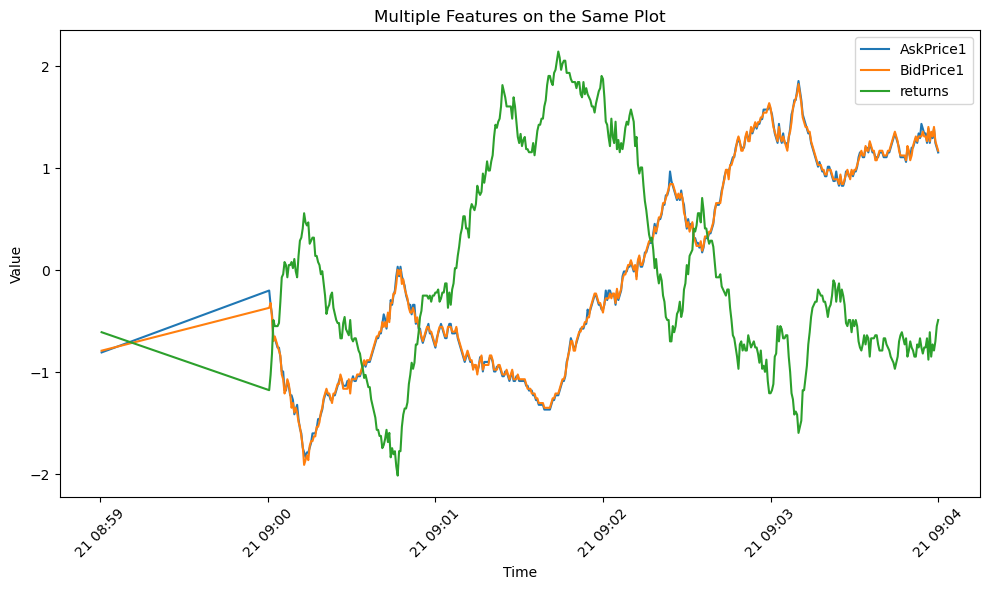

In [45]:
# # 设置绘图大小
# plt.figure(figsize=(10, 6))

# # 绘制每个特征
# plt.plot(filtered_table['exchange_time'], filtered_table['AskPrice1'], label='AskPrice1')
# plt.plot(filtered_table['exchange_time'], filtered_table['BidPrice1'], label='BidPrice1')
# plt.plot(filtered_table['exchange_time'], filtered_table['returns'], label='returns')
# # 添加图例
# plt.legend()

# # 添加标题和标签
# plt.title('Multiple Features on the Same Plot')
# plt.xlabel('Time')
# plt.ylabel('Value')

# # 显示图形
# plt.xticks(rotation=45)  # 旋转x轴标签，避免重叠
# plt.tight_layout()
# plt.show()

In [46]:
filtered_table

,order_book_id,exchange_time,trading_date,open,last,high,low,prev_settlement,prev_close,Volume,...,BidVolume2,BidVolume3,BidVolume4,BidVolume5,change_rate,current_volume,Position Increase,current_turnover,current_avg_price,returns
39845030,AG2412,2024-10-21 08:59:00.500,2024-10-21,7971.0,8226.0,8226.0,7931.0,7881.0,7896.0,1244934.0,...,186.0,76.0,10.0,249.0,0.043776,3764.0,2054.0,464439960.0,8226.000000,-0.606992
39845031,AG2412,2024-10-21 09:00:00.500,2024-10-21,7971.0,8235.0,8243.0,7931.0,7881.0,7896.0,1245844.0,...,2.0,3.0,5.0,31.0,0.044918,910.0,165.0,112387965.0,8233.550549,-1.175537
39845032,AG2412,2024-10-21 09:00:01.000,2024-10-21,7971.0,8237.0,8245.0,7931.0,7881.0,7896.0,1247629.0,...,3.0,5.0,4.0,50.0,0.045172,1785.0,-390.0,220530375.0,8236.428571,-1.025920
39845033,AG2412,2024-10-21 09:00:01.500,2024-10-21,7971.0,8236.0,8245.0,7931.0,7881.0,7896.0,1248179.0,...,1.0,10.0,30.0,11.0,0.045045,550.0,128.0,67932780.0,8234.276364,-0.816456
39845034,AG2412,2024-10-21 09:00:02.000,2024-10-21,7971.0,8230.0,8245.0,7931.0,7881.0,7896.0,1248719.0,...,336.0,293.0,185.0,84.0,0.044284,540.0,86.0,66681855.0,8232.327778,-0.487298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39845506,AG2412,2024-10-21 09:03:58.000,2024-10-21,7971.0,8270.0,8284.0,7931.0,7881.0,7896.0,1330302.0,...,106.0,26.0,87.0,118.0,0.049359,64.0,-22.0,7940115.0,8270.953125,-0.726685
39845507,AG2412,2024-10-21 09:03:58.500,2024-10-21,7971.0,8273.0,8284.0,7931.0,7881.0,7896.0,1330492.0,...,1.0,68.0,26.0,87.0,0.049740,190.0,55.0,23573970.0,8271.568421,-0.786532
39845508,AG2412,2024-10-21 09:03:59.000,2024-10-21,7971.0,8271.0,8284.0,7931.0,7881.0,7896.0,1330611.0,...,26.0,89.0,119.0,119.0,0.049486,119.0,26.0,14765835.0,8272.176471,-0.696762
39845509,AG2412,2024-10-21 09:03:59.500,2024-10-21,7971.0,8270.0,8284.0,7931.0,7881.0,7896.0,1330693.0,...,90.0,119.0,83.0,205.0,0.049359,82.0,46.0,10172280.0,8270.146341,-0.547145
